In [17]:
# pip install tensorflow

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential # keras is the library of Deep learning
from tensorflow.keras.layers import Dense #Dense network is a layer used in ANN
from tensorflow.keras.optimizers import Adam 

In [19]:
data = pd.read_csv('diamond.csv')
data

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [20]:
data.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [21]:
data.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

In [22]:
data.duplicated().sum()

83

In [23]:
data=data.drop_duplicates()

In [24]:
data.duplicated().sum()

0

In [38]:
data.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [39]:
Cut =LabelEncoder()
data['Cut']=Cut.fit_transform(data["Cut"])

Color =LabelEncoder()
data['Color']=Color.fit_transform(data['Color'])

Clarity=LabelEncoder()
data['Clarity']=Clarity.fit_transform(data['Clarity'])

Polish =LabelEncoder()
data['Polish']=Polish.fit_transform(data["Polish"])

Symmetry =LabelEncoder()
data['Symmetry']=Symmetry.fit_transform(data["Symmetry"])

Report =LabelEncoder()
data['Report']=Report.fit_transform(data["Report"])

C:\Users\HP\AppData\Local\Temp/ipykernel_21204/1265176027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cut']=Cut.fit_transform(data["Cut"])
C:\Users\HP\AppData\Local\Temp/ipykernel_21204/1265176027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Color']=Color.fit_transform(data['Color'])
C:\Users\HP\AppData\Local\Temp/ipykernel_21204/1265176027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [40]:
x=data.drop('Price',axis =1)
y=data['Price']

In [41]:
x

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,2,4,2,3,0,1
1,0.83,2,4,3,2,2,0
2,0.85,2,4,2,0,0,1
3,0.91,2,1,2,3,3,1
4,0.83,2,3,2,0,0,1
...,...,...,...,...,...,...,...
5995,1.03,2,0,2,0,0,1
5996,1.00,4,0,2,3,3,1
5997,1.02,2,0,2,0,0,1
5998,1.27,3,3,3,0,0,1


In [42]:
y

0        5169
1        3470
2        3183
3        4370
4        3171
        ...  
5995     6250
5996     5328
5997     6157
5998    11206
5999    30507
Name: Price, Length: 5917, dtype: int64

In [43]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=12)

In [44]:
x_train.shape ,x_test.shape

((4437, 7), (1480, 7))

### Creating model

In [45]:
model = Sequential()
#input layer +first hidden layer
model.add(Dense(50,input_dim=7,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='relu')) #output layer

callbacks =tf.keras.callbacks.EarlyStopping(monitor ='loss',patience=10)#early stopping is used to stop at its best epoc
#model.compile(loss = 'mse',optimizer='adam')#lr=0.001
model.compile(loss ='mse',optimizer=Adam(learning_rate=0.001))
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 50)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,051 (199.42 KB)

 Trainable params: 51,051 (199.42 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
training_info = model.fit(x_train,y_train,batch_size=500,epochs=200,
                         validation_data=(x_test,y_test),
                         callbacks=callbacks)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 240446080.0000 - val_loss: 245884288.0000
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 237645104.0000 - val_loss: 245339248.0000
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 246958160.0000 - val_loss: 242563568.0000
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 234480496.0000 - val_loss: 230037168.0000
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 212932336.0000 - val_loss: 184736048.0000
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161163488.0000 - val_loss: 109386560.0000
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109858392.0000 - val_loss: 109446808.0000
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111065304.0000 - val_loss: 107063616.0000
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95015664.0000 - val_loss: 100651840.0000
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91481104.0000 - val_loss: 97823904.0000
Epoch 11/20

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9715431.0000 - val_loss: 11082517.0000
Epoch 64/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9767642.0000 - val_loss: 10742065.0000
Epoch 65/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9004202.0000 - val_loss: 10804427.0000
Epoch 66/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9461036.0000 - val_loss: 10494223.0000
Epoch 67/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9845325.0000 - val_loss: 10435061.0000
Epoch 68/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9636329.0000 - val_loss: 10291598.0000
Epoch 69/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8680395.0000 - val_loss: 10157580.0000
Epoch 70/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8816459.0000 - val_loss: 10023113.0000
Epoch 71/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8329045.5000 - val_loss: 9880387.0000
Epoch 72/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8154602.0000 - val_loss: 9813439.0000
Epoch 73/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

Epoch 126/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4600225.0000 - val_loss: 5838475.5000
Epoch 127/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4423892.5000 - val_loss: 6164142.0000
Epoch 128/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4789029.5000 - val_loss: 6122544.0000
Epoch 129/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4727820.0000 - val_loss: 5790851.5000
Epoch 130/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4462190.5000 - val_loss: 5795554.5000
Epoch 131/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4644159.5000 - val_loss: 5841206.5000
Epoch 132/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4463992.0000 - val_loss: 5847634.0000
Epoch 133/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4141267.2500 - val_loss: 5828067.5000
Epoch 134/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4656610.5000 - val_loss: 5667845.5000
Epoch 135/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4002465.2500 - val_loss: 5782024.0000
Epoch 136/200
9/9 ━━━━━━━━━━━━

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3653421.5000 - val_loss: 5026837.5000
Epoch 189/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3308228.2500 - val_loss: 5239426.5000
Epoch 190/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3704548.5000 - val_loss: 5091929.0000
Epoch 191/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3483946.7500 - val_loss: 5218889.5000
Epoch 192/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3595428.7500 - val_loss: 5048329.5000
Epoch 193/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3463225.0000 - val_loss: 5007054.0000
Epoch 194/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3320847.2500 - val_loss: 5033234.0000
Epoch 195/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3581703.0000 - val_loss: 5138527.5000
Epoch 196/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3583287.7500 - val_loss: 5030511.5000
Epoch 197/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3381945.2500 - val_loss: 4978045.5000
Epoch 198/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

In [47]:
hist=training_info.history
hist

{'loss': [243027888.0,
  242407504.0,
  241357200.0,
  235346352.0,
  210942896.0,
  144383808.0,
  111998184.0,
  102489344.0,
  100546504.0,
  95579192.0,
  92095952.0,
  89317888.0,
  85384160.0,
  81350008.0,
  77006008.0,
  72654360.0,
  67637856.0,
  62102864.0,
  55040396.0,
  47773008.0,
  40079400.0,
  32889462.0,
  27112344.0,
  23234670.0,
  20847858.0,
  19264206.0,
  18125632.0,
  17362718.0,
  16666990.0,
  16082736.0,
  15575321.0,
  15203687.0,
  14920555.0,
  14648282.0,
  14382914.0,
  14512284.0,
  13913022.0,
  13659628.0,
  13439267.0,
  13131884.0,
  12895431.0,
  12789308.0,
  12828130.0,
  12927471.0,
  12382464.0,
  12190673.0,
  11994428.0,
  11846487.0,
  11736163.0,
  11482094.0,
  11465836.0,
  11276802.0,
  11124391.0,
  10993204.0,
  10876313.0,
  10781437.0,
  10556779.0,
  10558064.0,
  10743980.0,
  10390287.0,
  10085762.0,
  10028827.0,
  9896318.0,
  9877830.0,
  9409267.0,
  9311988.0,
  9209369.0,
  9253358.0,
  9148861.0,
  8882716.0,
  8654068.0

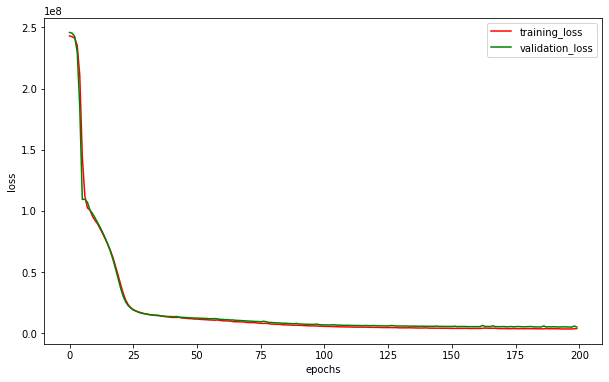

In [48]:
plt.figure(figsize=(10, 6)) 
plt.plot(hist['loss'],label='training_loss',color='red')
plt.plot(hist['val_loss'],label='validation_loss',color='green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
